# Linear Regression
**Sibt ul Hussain**

In [1]:
import numpy as np

In [2]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


$$ f(x) = x^4-4x^3+2 $$

In [3]:
f=lambda x: x**4-4*x**3+2

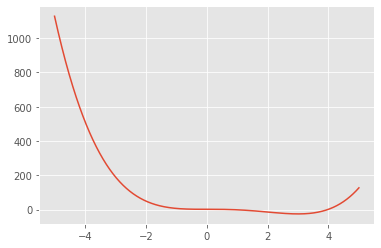

In [4]:
x=np.linspace(-5,5,1000)
y= f(x)
plt.plot(x,y)

### Brute-force Search
Lets do a brute-force search for the given variable in the limit.

In [5]:
minimum=+np.inf
mx=+np.inf

for x in np.arange(-5,5,0.0001):
    y = f(x)
    if (y<minimum):
        minimum = y
        mx = x

print("Local minimum occurs at {}".format(mx))

Local minimum occurs at 2.9999999999813554


### Gradient Descent

In [6]:
def f_derivative(x):
    # Your code here
    # Calculate the derivative and write your code here
    return 4*np.power(x, 3)-12*np.power(x, 2)

In [7]:
x_old = 0
x_new = np.random.rand(1,1) 
eps = 0.01 # step size
precision = 0.00001

# Your code here

while (abs(x_old-x_new)>= precision):
    x_old = x_new
    x_new = x_new - eps*f_derivative(x_new)

print ("Local minimum occurs at", x_new)

Local minimum occurs at [[2.99998523]]


#### Always Check your gradient, before debugging gradient descent,

We know that $$\frac{\partial f}{\partial x}=\frac{f(x+\epsilon)-f(x)}{\epsilon}$$

So always compare the difference between computed gradient using this formula.


#### Lets Check

In [8]:
eps=0.00001
x=1.5
dfx=(f(x+eps)-f(x))/eps
cdfx=f_derivative(x)

print (dfx, cdfx, dfx-cdfx)

-13.500044999936732 -13.5 -4.499993673157121e-05


### Let's generate some random data

In [9]:
X = np.arange(0,5,0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y

Text(0, 0.5, 'Y')

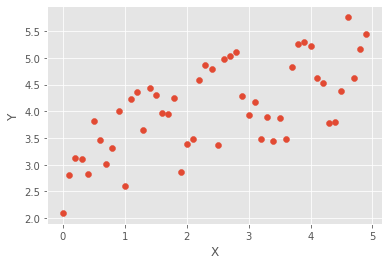

In [10]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

### Let's visualize our solution space

In [11]:
cf=lambda t0,t1,x,y: np.dot(t1*x+t0-y,t1*x+t0-y)
#square error

In [12]:
t0=arange(-5,+5,0.01)
t1=arange(-5,+5,0.01)

In [13]:
ecf=np.zeros((len(t0),len(t1)))

for i in range(len(t0)):
    for j in range(len(t1)):
        ecf[i,j]=cf(t0[i],t1[j],X,Y)

In [14]:
print (ecf)

[[25734.52911048 25671.16640958 25607.88745057 ...  2705.54897459
   2722.79526252  2740.12153122]
 [25713.22181554 25649.88351182 25586.62897188 ...  2708.66855681
   2725.93934254  2743.29011792]
 [25691.92446778 25628.61100216 25565.38116045 ...  2711.79817564
   2729.09344032  2746.46872626]
 ...
 [ 9456.52163263  9417.58577676  9378.73257459 ... 10780.76047498
  10822.4340487  10864.18603299]
 [ 9445.18438371  9406.27304128  9367.44432662 ... 10793.85028498
  10835.54836    10877.32484411]
 [ 9433.85730956  9394.97050816  9356.1663197  ... 10806.94985621
  10848.67228667 10890.47341536]]


In [15]:
# Generate theta_0 and theta_1 values for the cost function...
tX, tY = np.meshgrid(t0, t1)
print (tX.shape, tY.shape)

(1000, 1000) (1000, 1000)


In [16]:
print (ecf.shape)

(1000, 1000)


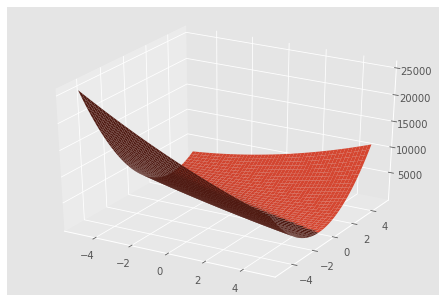

In [17]:
#Plot the cost function...
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(tX,tY,ecf.T)
# ax.set_xlabel(r'$\theta_0$(Intercept)')
# ax.set_ylabel(r'$\theta_1$(Slope)')
# ax.set_zlabel(r'$J(\theta_0,\theta_1)$(Cost Function)')

### Time for our regression implementation

$$
h(X, \theta) = X^T . \theta
$$

In [18]:
from nose.tools import assert_equal

In [19]:
def hyp(theta, X):
    # Your code here
    return np.dot(theta,X.T)

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [20]:
def cost_function(theta,X,Y):
    # Your code here
    assert_equal(X.shape[0],Y.shape[0])
    assert_equal (X.shape[1],theta.shape[0])
    
    return (0.5)*np.mean(np.power(hyp(theta,X)-Y,2))

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [21]:
def derivative_cost_function(theta,X,Y):
    nexamples=float(X.shape[0])
    # Your code here
    assert_equal(X.shape[0],Y.shape[0])
    assert_equal (X.shape[1],theta.shape[0])
    
    return np.sum((hyp(theta,X)-Y)*X.T,axis=1)/nexamples

In [22]:
print (X.shape)
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print (nx.shape)

(50,)
(50, 2)


In [23]:
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)
print (thetas)

[0.5881308  0.89771373]


In [24]:
cf=cost_function(thetas,nx,Y)
print (cf)

1.7272345400118703


In [25]:
ad=derivative_cost_function(thetas,nx,Y)
print (ad)

[-3.77256334 -1.72335479]


In [29]:
#Gradient Descent...
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxniter=20000):
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],)
    
    eps=0.00001
    alpha=0.01
    cf=[]
    numiter=0
    
    # Your code here
    
    theta_new = np.zeros_like(thetas)
    
    while np.mean(abs(theta_new-thetas))>0.000001:
        thetas = theta_new
        cf.append(cost_function(theta_new,X,Y))
        theta_new = theta_new-alpha*derivative_cost_function(theta_new,X,Y)
    
    return theta_new

In [30]:
theta_new=GradientDescent(nx,Y,cost_function,derivative_cost_function)

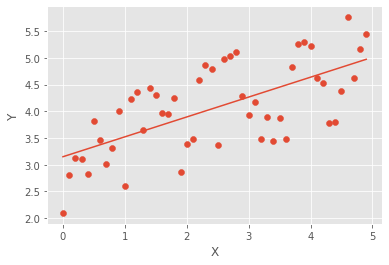

In [31]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new))